#**Preparing our Dataset**



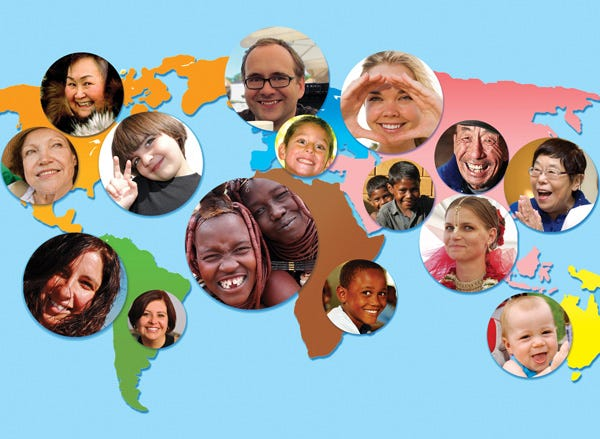

In an ever-evolving world, the pursuit of happiness is a fundamental aspiration for individuals and nations alike. The World Happiness Index, a comprehensive measure of well-being and life satisfaction, offers a unique lens through which we can analyze and understand the factors that contribute to happiness on a global scale.

Data Source:https://worldhappiness.report/data/
(We have taken the data from World Happiness Report 2023-Data for Table 2.1)

The World Happiness Report is a landmark survey of the state of global happiness and we aim to study how happy we actually are.

For this study we have taken the data from the link displayed on screen. The time coverage for the dataset is from 2005 to 2023. There are approximately 165 countries which we have taken into consideration while doing our analysis.

We exported the data and used the .csv file to load it onto our jupyter notebook.

In our data analysis, we have used the term 'Life Ladder' as a substitute for 'Happiness Index'





#**1. IMPORTING DATA**

**Importing Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

**Reading our CSV file containing dataset and creating a dataframe**

In [ ]:
data_read = pd.read_csv('https://raw.githubusercontent.com/amoghvarshk/Python-Project/main/DataForTable2.1WHR2023.csv')

In [ ]:
data_read

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.350,0.451,50.500,0.718,0.168,0.882,0.414,0.258
1,Afghanistan,2009,4.402,7.509,0.552,50.800,0.679,0.191,0.850,0.481,0.237
2,Afghanistan,2010,4.758,7.614,0.539,51.100,0.600,0.121,0.707,0.517,0.275
3,Afghanistan,2011,3.832,7.581,0.521,51.400,0.496,0.164,0.731,0.480,0.267
4,Afghanistan,2012,3.783,7.661,0.521,51.700,0.531,0.238,0.776,0.614,0.268
...,...,...,...,...,...,...,...,...,...,...,...
2194,Zimbabwe,2018,3.616,7.783,0.775,52.625,0.763,-0.051,0.844,0.658,0.212
2195,Zimbabwe,2019,2.694,7.698,0.759,53.100,0.632,-0.047,0.831,0.658,0.235
2196,Zimbabwe,2020,3.160,7.596,0.717,53.575,0.643,0.006,0.789,0.661,0.346
2197,Zimbabwe,2021,3.155,7.657,0.685,54.050,0.668,-0.076,0.757,0.610,0.242


In [ ]:
# Assigning data_read to df
df = data_read

In [ ]:
df

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.350,0.451,50.500,0.718,0.168,0.882,0.414,0.258
1,Afghanistan,2009,4.402,7.509,0.552,50.800,0.679,0.191,0.850,0.481,0.237
2,Afghanistan,2010,4.758,7.614,0.539,51.100,0.600,0.121,0.707,0.517,0.275
3,Afghanistan,2011,3.832,7.581,0.521,51.400,0.496,0.164,0.731,0.480,0.267
4,Afghanistan,2012,3.783,7.661,0.521,51.700,0.531,0.238,0.776,0.614,0.268
...,...,...,...,...,...,...,...,...,...,...,...
2194,Zimbabwe,2018,3.616,7.783,0.775,52.625,0.763,-0.051,0.844,0.658,0.212
2195,Zimbabwe,2019,2.694,7.698,0.759,53.100,0.632,-0.047,0.831,0.658,0.235
2196,Zimbabwe,2020,3.160,7.596,0.717,53.575,0.643,0.006,0.789,0.661,0.346
2197,Zimbabwe,2021,3.155,7.657,0.685,54.050,0.668,-0.076,0.757,0.610,0.242


#**2. DATA PREPROCESSING**

In [ ]:
#Printing information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2199 entries, 0 to 2198
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      2199 non-null   object 
 1   year                              2199 non-null   int64  
 2   Life Ladder                       2199 non-null   float64
 3   Log GDP per capita                2179 non-null   float64
 4   Social support                    2186 non-null   float64
 5   Healthy life expectancy at birth  2145 non-null   float64
 6   Freedom to make life choices      2166 non-null   float64
 7   Generosity                        2126 non-null   float64
 8   Perceptions of corruption         2083 non-null   float64
 9   Positive affect                   2175 non-null   float64
 10  Negative affect                   2183 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 189.1+ KB


In [ ]:
# Count the number of data rows for each year
life_ladder_counts = df.groupby('year')['Life Ladder'].count()
life_ladder_counts

year
2005     27
2006     89
2007    102
2008    110
2009    114
2010    124
2011    146
2012    141
2013    136
2014    144
2015    142
2016    141
2017    147
2018    141
2019    143
2020    116
2021    122
2022    114
Name: Life Ladder, dtype: int64

**Removed data pertaining to the years 2005 and 2006, where the datasets exhibited less than 100 rows, optimizing dataset quality.**

In [ ]:
new_data=df[df['year']>2006]
new_data

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.350,0.451,50.500,0.718,0.168,0.882,0.414,0.258
1,Afghanistan,2009,4.402,7.509,0.552,50.800,0.679,0.191,0.850,0.481,0.237
2,Afghanistan,2010,4.758,7.614,0.539,51.100,0.600,0.121,0.707,0.517,0.275
3,Afghanistan,2011,3.832,7.581,0.521,51.400,0.496,0.164,0.731,0.480,0.267
4,Afghanistan,2012,3.783,7.661,0.521,51.700,0.531,0.238,0.776,0.614,0.268
...,...,...,...,...,...,...,...,...,...,...,...
2194,Zimbabwe,2018,3.616,7.783,0.775,52.625,0.763,-0.051,0.844,0.658,0.212
2195,Zimbabwe,2019,2.694,7.698,0.759,53.100,0.632,-0.047,0.831,0.658,0.235
2196,Zimbabwe,2020,3.160,7.596,0.717,53.575,0.643,0.006,0.789,0.661,0.346
2197,Zimbabwe,2021,3.155,7.657,0.685,54.050,0.668,-0.076,0.757,0.610,0.242


**Checking for duplicate values**

In [ ]:
new_data.duplicated().sum()

0

**Removing countries with less than 10 years of data to further optimize dataset quality**

In [ ]:
# Count number of years of data present for each country
Data_country_year_counts= new_data.groupby('Country name')['year'].transform('count')

In [ ]:
Data_country_year_counts

0       14
1       14
2       14
3       14
4       14
        ..
2194    16
2195    16
2196    16
2197    16
2198    16
Name: year, Length: 2083, dtype: int64

In [ ]:
# Filtering data for countries below 10 years of data
countries = new_data[Data_country_year_counts>=10]

In [ ]:
countries

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.350,0.451,50.500,0.718,0.168,0.882,0.414,0.258
1,Afghanistan,2009,4.402,7.509,0.552,50.800,0.679,0.191,0.850,0.481,0.237
2,Afghanistan,2010,4.758,7.614,0.539,51.100,0.600,0.121,0.707,0.517,0.275
3,Afghanistan,2011,3.832,7.581,0.521,51.400,0.496,0.164,0.731,0.480,0.267
4,Afghanistan,2012,3.783,7.661,0.521,51.700,0.531,0.238,0.776,0.614,0.268
...,...,...,...,...,...,...,...,...,...,...,...
2194,Zimbabwe,2018,3.616,7.783,0.775,52.625,0.763,-0.051,0.844,0.658,0.212
2195,Zimbabwe,2019,2.694,7.698,0.759,53.100,0.632,-0.047,0.831,0.658,0.235
2196,Zimbabwe,2020,3.160,7.596,0.717,53.575,0.643,0.006,0.789,0.661,0.346
2197,Zimbabwe,2021,3.155,7.657,0.685,54.050,0.668,-0.076,0.757,0.610,0.242


**Fill missing values in 'Log GDP per capita' with the mean values for each country**

In [ ]:
country_gdp_mean = countries.groupby('Country name')['Log GDP per capita'].mean()
country_gdp_mean

Country name
Afghanistan     7.585615
Albania         9.396933
Algeria         9.339800
Argentina      10.036250
Armenia         9.333933
                 ...    
Venezuela       8.455167
Vietnam         8.977187
Yemen           7.925250
Zambia          8.067071
Zimbabwe        7.621000
Name: Log GDP per capita, Length: 136, dtype: float64

In [ ]:
#Finding null values and filling it with mean values for the "Log GDP per capita" column
cond1 = pd.isnull(countries['Log GDP per capita'])
countries.loc[cond1, 'Log GDP per capita'] = countries[cond1].apply(lambda row: country_gdp_mean[row['Country name']] if pd.isnull(row['Log GDP per capita']) else row['Log GDP per capita'], axis=1)

print(countries)

#Check for Null values
countries.isna().sum()

     Country name  year  Life Ladder  Log GDP per capita  Social support  \
0     Afghanistan  2008        3.724               7.350           0.451   
1     Afghanistan  2009        4.402               7.509           0.552   
2     Afghanistan  2010        4.758               7.614           0.539   
3     Afghanistan  2011        3.832               7.581           0.521   
4     Afghanistan  2012        3.783               7.661           0.521   
...           ...   ...          ...                 ...             ...   
2194     Zimbabwe  2018        3.616               7.783           0.775   
2195     Zimbabwe  2019        2.694               7.698           0.759   
2196     Zimbabwe  2020        3.160               7.596           0.717   
2197     Zimbabwe  2021        3.155               7.657           0.685   
2198     Zimbabwe  2022        3.296               7.670           0.666   

      Healthy life expectancy at birth  Freedom to make life choices  \
0              

Country name                         0
year                                 0
Life Ladder                          0
Log GDP per capita                   0
Social support                       9
Healthy life expectancy at birth    49
Freedom to make life choices        25
Generosity                          30
Perceptions of corruption           99
Positive affect                     17
Negative affect                     10
dtype: int64

**Fill missing values in 'Social Support' with the mean values for each country**

In [ ]:
country_social_support = countries.groupby('Country name')['Social support'].mean()
cond2 = pd.isnull(countries['Social support'])
countries.loc[cond2, 'Social support'] = countries[cond2].apply(lambda row: country_social_support[row['Country name']] if pd.isnull(row['Social support']) else row['Social support'], axis=1)
print(countries)
countries.isna().sum()

     Country name  year  Life Ladder  Log GDP per capita  Social support  \
0     Afghanistan  2008        3.724               7.350           0.451   
1     Afghanistan  2009        4.402               7.509           0.552   
2     Afghanistan  2010        4.758               7.614           0.539   
3     Afghanistan  2011        3.832               7.581           0.521   
4     Afghanistan  2012        3.783               7.661           0.521   
...           ...   ...          ...                 ...             ...   
2194     Zimbabwe  2018        3.616               7.783           0.775   
2195     Zimbabwe  2019        2.694               7.698           0.759   
2196     Zimbabwe  2020        3.160               7.596           0.717   
2197     Zimbabwe  2021        3.155               7.657           0.685   
2198     Zimbabwe  2022        3.296               7.670           0.666   

      Healthy life expectancy at birth  Freedom to make life choices  \
0              

Country name                         0
year                                 0
Life Ladder                          0
Log GDP per capita                   0
Social support                       0
Healthy life expectancy at birth    49
Freedom to make life choices        25
Generosity                          30
Perceptions of corruption           99
Positive affect                     17
Negative affect                     10
dtype: int64

**Fill missing values in 'Healthy Life expectancy at birth' with the mean values for each country**

In [ ]:
country_healthy_life_expectancy = countries.groupby('Country name')['Healthy life expectancy at birth'].mean()
cond3 = pd.isnull(countries['Healthy life expectancy at birth'])
countries.loc[cond3, 'Healthy life expectancy at birth'] = countries[cond3].apply(lambda row: country_healthy_life_expectancy[row['Country name']] if pd.isnull(row['Healthy life expectancy at birth']) else row['Healthy life expectancy at birth'], axis=1)
print(countries)
countries.isna().sum()

     Country name  year  Life Ladder  Log GDP per capita  Social support  \
0     Afghanistan  2008        3.724               7.350           0.451   
1     Afghanistan  2009        4.402               7.509           0.552   
2     Afghanistan  2010        4.758               7.614           0.539   
3     Afghanistan  2011        3.832               7.581           0.521   
4     Afghanistan  2012        3.783               7.661           0.521   
...           ...   ...          ...                 ...             ...   
2194     Zimbabwe  2018        3.616               7.783           0.775   
2195     Zimbabwe  2019        2.694               7.698           0.759   
2196     Zimbabwe  2020        3.160               7.596           0.717   
2197     Zimbabwe  2021        3.155               7.657           0.685   
2198     Zimbabwe  2022        3.296               7.670           0.666   

      Healthy life expectancy at birth  Freedom to make life choices  \
0              

Country name                         0
year                                 0
Life Ladder                          0
Log GDP per capita                   0
Social support                       0
Healthy life expectancy at birth    27
Freedom to make life choices        25
Generosity                          30
Perceptions of corruption           99
Positive affect                     17
Negative affect                     10
dtype: int64

**Find any NaN values for countries, if any**

In [ ]:
country_healthy_life_expectancy[country_healthy_life_expectancy.isna()]

Country name
Hong Kong S.A.R. of China   NaN
Kosovo                      NaN
Name: Healthy life expectancy at birth, dtype: float64

**Checking NaN value for 'Hong Kong S.A.R of China' by getting the dataframe**

In [ ]:
countries[countries['Country name']== 'Hong Kong S.A.R. of China']

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
794,Hong Kong S.A.R. of China,2008,5.137,10.816,0.840,NaN,0.922,0.292,0.274,0.575,0.237
795,Hong Kong S.A.R. of China,2009,5.397,10.788,0.835,NaN,0.918,0.303,0.272,0.606,0.210
796,Hong Kong S.A.R. of China,2010,5.643,10.847,0.857,NaN,0.890,0.328,0.256,0.601,0.183
797,Hong Kong S.A.R. of China,2011,5.474,10.887,0.846,NaN,0.894,0.230,0.245,0.582,0.196
798,Hong Kong S.A.R. of China,2012,5.484,10.893,0.826,NaN,0.880,0.218,0.380,0.580,0.183
799,Hong Kong S.A.R. of China,2014,5.458,10.939,0.834,NaN,0.843,0.219,0.423,0.602,0.243
800,Hong Kong S.A.R. of China,2016,5.498,10.970,0.832,NaN,0.800,0.096,0.403,0.569,0.213
801,Hong Kong S.A.R. of China,2017,5.362,10.999,0.831,NaN,0.831,0.136,0.416,0.536,0.201
802,Hong Kong S.A.R. of China,2019,5.659,10.995,0.856,NaN,0.727,0.063,0.432,0.519,0.358
803,Hong Kong S.A.R. of China,2020,5.295,10.931,0.813,NaN,0.705,-0.074,0.380,0.522,0.210


**Checking NaN value for 'Kosovo' by getting the dataframe**

In [ ]:
countries[countries['Country name']== 'Kosovo']

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
1031,Kosovo,2007,5.104,9.142067,0.848,NaN,0.381,NaN,0.894,0.614,0.237
1032,Kosovo,2008,5.522,8.858000,0.884,NaN,NaN,0.097,0.849,0.500,0.318
1033,Kosovo,2009,5.891,8.899000,0.830,NaN,0.506,0.206,0.968,0.528,0.169
1034,Kosovo,2010,5.177,8.940000,0.708,NaN,0.451,0.174,0.967,0.673,0.118
1035,Kosovo,2011,4.860,8.992000,0.759,NaN,0.589,0.006,0.919,0.604,0.124
1036,Kosovo,2012,5.640,9.000000,0.757,NaN,0.636,0.030,0.950,0.562,0.100
1037,Kosovo,2013,6.126,9.046000,0.721,NaN,0.568,0.117,0.935,0.650,0.203
1038,Kosovo,2014,5.000,9.082000,0.706,NaN,0.441,0.013,0.775,0.552,0.206
1039,Kosovo,2015,5.077,9.153000,0.805,NaN,0.561,0.180,0.851,0.685,0.180
1040,Kosovo,2016,5.759,9.213000,0.824,NaN,0.827,0.123,0.941,0.588,0.150


**Drop entire data of Hong Kong S.A.R of China from the dataset**

In [ ]:
condition1 = countries[countries['Country name'] =='Hong Kong S.A.R. of China'].index
countries.drop(condition1,inplace=True)
countries

<ipython-input-132-11a0382badbe>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  countries.drop(condition1,inplace=True)


,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.350,0.451,50.500,0.718,0.168,0.882,0.414,0.258
1,Afghanistan,2009,4.402,7.509,0.552,50.800,0.679,0.191,0.850,0.481,0.237
2,Afghanistan,2010,4.758,7.614,0.539,51.100,0.600,0.121,0.707,0.517,0.275
3,Afghanistan,2011,3.832,7.581,0.521,51.400,0.496,0.164,0.731,0.480,0.267
4,Afghanistan,2012,3.783,7.661,0.521,51.700,0.531,0.238,0.776,0.614,0.268
...,...,...,...,...,...,...,...,...,...,...,...
2194,Zimbabwe,2018,3.616,7.783,0.775,52.625,0.763,-0.051,0.844,0.658,0.212
2195,Zimbabwe,2019,2.694,7.698,0.759,53.100,0.632,-0.047,0.831,0.658,0.235
2196,Zimbabwe,2020,3.160,7.596,0.717,53.575,0.643,0.006,0.789,0.661,0.346
2197,Zimbabwe,2021,3.155,7.657,0.685,54.050,0.668,-0.076,0.757,0.610,0.242


**Drop entire data of Kosovo from the dataset**

In [ ]:
condition2 = countries[countries['Country name'] =='Kosovo'].index
countries.drop(condition2,inplace=True)
countries

<ipython-input-133-dbe1f1946d19>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  countries.drop(condition2,inplace=True)


,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.350,0.451,50.500,0.718,0.168,0.882,0.414,0.258
1,Afghanistan,2009,4.402,7.509,0.552,50.800,0.679,0.191,0.850,0.481,0.237
2,Afghanistan,2010,4.758,7.614,0.539,51.100,0.600,0.121,0.707,0.517,0.275
3,Afghanistan,2011,3.832,7.581,0.521,51.400,0.496,0.164,0.731,0.480,0.267
4,Afghanistan,2012,3.783,7.661,0.521,51.700,0.531,0.238,0.776,0.614,0.268
...,...,...,...,...,...,...,...,...,...,...,...
2194,Zimbabwe,2018,3.616,7.783,0.775,52.625,0.763,-0.051,0.844,0.658,0.212
2195,Zimbabwe,2019,2.694,7.698,0.759,53.100,0.632,-0.047,0.831,0.658,0.235
2196,Zimbabwe,2020,3.160,7.596,0.717,53.575,0.643,0.006,0.789,0.661,0.346
2197,Zimbabwe,2021,3.155,7.657,0.685,54.050,0.668,-0.076,0.757,0.610,0.242


**Fill missing values in 'Freedom to make life choices' with the mean values for each country**

In [ ]:
country_freedom = countries.groupby('Country name')['Freedom to make life choices'].mean()
cond4 = pd.isnull(countries['Freedom to make life choices'])
countries.loc[cond4, 'Freedom to make life choices'] = countries[cond4].apply(lambda row: country_freedom[row['Country name']] if pd.isnull(row['Freedom to make life choices']) else row['Freedom to make life choices'], axis=1)
print(countries)
countries.isna().sum()

     Country name  year  Life Ladder  Log GDP per capita  Social support  \
0     Afghanistan  2008        3.724               7.350           0.451   
1     Afghanistan  2009        4.402               7.509           0.552   
2     Afghanistan  2010        4.758               7.614           0.539   
3     Afghanistan  2011        3.832               7.581           0.521   
4     Afghanistan  2012        3.783               7.661           0.521   
...           ...   ...          ...                 ...             ...   
2194     Zimbabwe  2018        3.616               7.783           0.775   
2195     Zimbabwe  2019        2.694               7.698           0.759   
2196     Zimbabwe  2020        3.160               7.596           0.717   
2197     Zimbabwe  2021        3.155               7.657           0.685   
2198     Zimbabwe  2022        3.296               7.670           0.666   

      Healthy life expectancy at birth  Freedom to make life choices  \
0              

Country name                         0
year                                 0
Life Ladder                          0
Log GDP per capita                   0
Social support                       0
Healthy life expectancy at birth     0
Freedom to make life choices         0
Generosity                          29
Perceptions of corruption           99
Positive affect                     17
Negative affect                     10
dtype: int64

**Fill missing values in 'Generosity' with the mean values for each country**

In [ ]:
country_generosity = countries.groupby('Country name')['Generosity'].mean()
cond5 = pd.isnull(countries['Generosity'])
countries.loc[cond5, 'Generosity'] = countries[cond5].apply(lambda row: country_generosity[row['Country name']] if pd.isnull(row['Generosity']) else row['Generosity'], axis=1)
print(countries)
countries.isna().sum()

     Country name  year  Life Ladder  Log GDP per capita  Social support  \
0     Afghanistan  2008        3.724               7.350           0.451   
1     Afghanistan  2009        4.402               7.509           0.552   
2     Afghanistan  2010        4.758               7.614           0.539   
3     Afghanistan  2011        3.832               7.581           0.521   
4     Afghanistan  2012        3.783               7.661           0.521   
...           ...   ...          ...                 ...             ...   
2194     Zimbabwe  2018        3.616               7.783           0.775   
2195     Zimbabwe  2019        2.694               7.698           0.759   
2196     Zimbabwe  2020        3.160               7.596           0.717   
2197     Zimbabwe  2021        3.155               7.657           0.685   
2198     Zimbabwe  2022        3.296               7.670           0.666   

      Healthy life expectancy at birth  Freedom to make life choices  \
0              

Country name                         0
year                                 0
Life Ladder                          0
Log GDP per capita                   0
Social support                       0
Healthy life expectancy at birth     0
Freedom to make life choices         0
Generosity                           0
Perceptions of corruption           99
Positive affect                     17
Negative affect                     10
dtype: int64

**Fill missing values in 'Perception of corruption' with the mean values for each country**

In [ ]:
country_corruption = countries.groupby('Country name')['Perceptions of corruption'].mean()
cond6 = pd.isnull(countries['Perceptions of corruption'])
countries.loc[cond6, 'Perceptions of corruption'] = countries[cond6].apply(lambda row: country_corruption[row['Country name']] if pd.isnull(row['Perceptions of corruption']) else row['Perceptions of corruption'], axis=1)
print(countries)
countries.isna().sum()

     Country name  year  Life Ladder  Log GDP per capita  Social support  \
0     Afghanistan  2008        3.724               7.350           0.451   
1     Afghanistan  2009        4.402               7.509           0.552   
2     Afghanistan  2010        4.758               7.614           0.539   
3     Afghanistan  2011        3.832               7.581           0.521   
4     Afghanistan  2012        3.783               7.661           0.521   
...           ...   ...          ...                 ...             ...   
2194     Zimbabwe  2018        3.616               7.783           0.775   
2195     Zimbabwe  2019        2.694               7.698           0.759   
2196     Zimbabwe  2020        3.160               7.596           0.717   
2197     Zimbabwe  2021        3.155               7.657           0.685   
2198     Zimbabwe  2022        3.296               7.670           0.666   

      Healthy life expectancy at birth  Freedom to make life choices  \
0              

Country name                         0
year                                 0
Life Ladder                          0
Log GDP per capita                   0
Social support                       0
Healthy life expectancy at birth     0
Freedom to make life choices         0
Generosity                           0
Perceptions of corruption           25
Positive affect                     17
Negative affect                     10
dtype: int64

**Checking for NaN values in Perception of Corruption column**

In [ ]:
country_corruption[country_corruption.isna()]

Country name
China          NaN
Turkmenistan   NaN
Name: Perceptions of corruption, dtype: float64

**Checking NaN value for 'China' by getting the dataframe**

In [ ]:
countries[countries['Country name']== 'China']

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
382,China,2007,4.863,8.824,0.811,65.920,0.848364,-0.179,NaN,0.664,0.159
383,China,2008,4.846,8.911,0.748,66.180,0.853000,-0.095,NaN,0.705,0.147
384,China,2009,4.454,8.996,0.798,66.440,0.771000,-0.163,NaN,0.670,0.162
385,China,2010,4.653,9.092,0.768,66.700,0.805000,-0.136,NaN,0.658,0.158
386,China,2011,5.037,9.178,0.787,66.960,0.824000,-0.189,NaN,0.710,0.134
387,China,2012,5.095,9.247,0.788,67.220,0.808000,-0.187,NaN,0.689,0.159
388,China,2013,5.241,9.315,0.778,67.480,0.805000,-0.161,NaN,0.717,0.142
389,China,2014,5.196,9.380,0.820,67.740,0.848364,-0.219,NaN,0.710,0.112
390,China,2015,5.304,9.442,0.794,68.000,0.848364,-0.247,NaN,0.667,0.171
391,China,2016,5.325,9.503,0.742,68.125,0.848364,-0.230,NaN,0.683,0.146


**Checking NaN value for 'Turkmenistan' by getting the dataframe**

In [ ]:
countries[countries['Country name']== 'Turkmenistan']

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
1996,Turkmenistan,2009,6.568,8.955,0.924,59.78,0.777,-0.102,NaN,0.695,0.152
1997,Turkmenistan,2011,5.792,9.146,0.964,60.42,0.777,0.018,NaN,0.577,0.122
1998,Turkmenistan,2012,5.464,9.233,0.946,60.74,0.786,-0.123,NaN,0.541,0.117
1999,Turkmenistan,2013,5.392,9.312,0.846,61.06,0.705,-0.072,NaN,0.552,0.160
2000,Turkmenistan,2014,5.787,9.392,0.909,61.38,0.805,0.031,NaN,0.614,0.154
2001,Turkmenistan,2015,5.791,9.437,0.960,61.70,0.701,0.092,NaN,0.633,0.301
2002,Turkmenistan,2016,5.887,9.479,0.929,61.80,0.749,0.004,NaN,0.560,0.255
2003,Turkmenistan,2017,5.229,9.525,0.908,61.90,0.720,0.065,NaN,0.488,0.350
2004,Turkmenistan,2018,4.621,9.569,0.984,62.00,0.858,0.259,NaN,0.567,0.189
2005,Turkmenistan,2019,5.474,9.615,0.982,62.10,0.892,0.284,NaN,0.494,0.183


**Drop entire data of China from the dataset**

In [ ]:
condition3 = countries[countries['Country name'] =='China'].index
countries.drop(condition3,inplace=True)
countries

<ipython-input-140-4d5d1dca12da>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  countries.drop(condition3,inplace=True)


,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.350,0.451,50.500,0.718,0.168,0.882,0.414,0.258
1,Afghanistan,2009,4.402,7.509,0.552,50.800,0.679,0.191,0.850,0.481,0.237
2,Afghanistan,2010,4.758,7.614,0.539,51.100,0.600,0.121,0.707,0.517,0.275
3,Afghanistan,2011,3.832,7.581,0.521,51.400,0.496,0.164,0.731,0.480,0.267
4,Afghanistan,2012,3.783,7.661,0.521,51.700,0.531,0.238,0.776,0.614,0.268
...,...,...,...,...,...,...,...,...,...,...,...
2194,Zimbabwe,2018,3.616,7.783,0.775,52.625,0.763,-0.051,0.844,0.658,0.212
2195,Zimbabwe,2019,2.694,7.698,0.759,53.100,0.632,-0.047,0.831,0.658,0.235
2196,Zimbabwe,2020,3.160,7.596,0.717,53.575,0.643,0.006,0.789,0.661,0.346
2197,Zimbabwe,2021,3.155,7.657,0.685,54.050,0.668,-0.076,0.757,0.610,0.242


**Drop entire data of Turkmenistan from the dataset**

In [ ]:
condition4 = countries[countries['Country name'] =='Turkmenistan'].index
countries.drop(condition4,inplace=True)
countries

<ipython-input-90-fdca3e1a1034>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  countries.drop(condition4,inplace=True)


,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.350,0.451,50.500,0.718,0.168,0.882,0.414,0.258
1,Afghanistan,2009,4.402,7.509,0.552,50.800,0.679,0.191,0.850,0.481,0.237
2,Afghanistan,2010,4.758,7.614,0.539,51.100,0.600,0.121,0.707,0.517,0.275
3,Afghanistan,2011,3.832,7.581,0.521,51.400,0.496,0.164,0.731,0.480,0.267
4,Afghanistan,2012,3.783,7.661,0.521,51.700,0.531,0.238,0.776,0.614,0.268
...,...,...,...,...,...,...,...,...,...,...,...
2194,Zimbabwe,2018,3.616,7.783,0.775,52.625,0.763,-0.051,0.844,0.658,0.212
2195,Zimbabwe,2019,2.694,7.698,0.759,53.100,0.632,-0.047,0.831,0.658,0.235
2196,Zimbabwe,2020,3.160,7.596,0.717,53.575,0.643,0.006,0.789,0.661,0.346
2197,Zimbabwe,2021,3.155,7.657,0.685,54.050,0.668,-0.076,0.757,0.610,0.242


**After dropping irrelevant data, we check for null values in Perception of Corruption column**

In [ ]:
countries.isna().sum()

Country name                         0
year                                 0
Life Ladder                          0
Log GDP per capita                   0
Social support                       0
Healthy life expectancy at birth     0
Freedom to make life choices         0
Generosity                           0
Perceptions of corruption            0
Positive affect                     17
Negative affect                     10
dtype: int64

**Fill missing values in 'Positive Affect' with the mean values for each country**

In [ ]:
country_positive_affect = countries.groupby('Country name')['Positive affect'].mean()
cond7 = pd.isnull(countries['Positive affect'])
countries.loc[cond7, 'Positive affect'] = countries[cond7].apply(lambda row: country_positive_affect[row['Country name']] if pd.isnull(row['Positive affect']) else row['Positive affect'], axis=1)
print(countries)
countries.isna().sum()

     Country name  year  Life Ladder  Log GDP per capita  Social support  \
0     Afghanistan  2008        3.724               7.350           0.451   
1     Afghanistan  2009        4.402               7.509           0.552   
2     Afghanistan  2010        4.758               7.614           0.539   
3     Afghanistan  2011        3.832               7.581           0.521   
4     Afghanistan  2012        3.783               7.661           0.521   
...           ...   ...          ...                 ...             ...   
2194     Zimbabwe  2018        3.616               7.783           0.775   
2195     Zimbabwe  2019        2.694               7.698           0.759   
2196     Zimbabwe  2020        3.160               7.596           0.717   
2197     Zimbabwe  2021        3.155               7.657           0.685   
2198     Zimbabwe  2022        3.296               7.670           0.666   

      Healthy life expectancy at birth  Freedom to make life choices  \
0              

Country name                         0
year                                 0
Life Ladder                          0
Log GDP per capita                   0
Social support                       0
Healthy life expectancy at birth     0
Freedom to make life choices         0
Generosity                           0
Perceptions of corruption            0
Positive affect                      0
Negative affect                     10
dtype: int64

**Fill missing values in 'Negative Affect' with the mean values for each country**

In [ ]:
country_negative_affect = countries.groupby('Country name')['Negative affect'].mean()
cond8 = pd.isnull(countries['Negative affect'])
countries.loc[cond8, 'Negative affect'] = countries[cond8].apply(lambda row: country_negative_affect[row['Country name']] if pd.isnull(row['Negative affect']) else row['Negative affect'], axis=1)
print(countries)
countries.isna().sum()

     Country name  year  Life Ladder  Log GDP per capita  Social support  \
0     Afghanistan  2008        3.724               7.350           0.451   
1     Afghanistan  2009        4.402               7.509           0.552   
2     Afghanistan  2010        4.758               7.614           0.539   
3     Afghanistan  2011        3.832               7.581           0.521   
4     Afghanistan  2012        3.783               7.661           0.521   
...           ...   ...          ...                 ...             ...   
2194     Zimbabwe  2018        3.616               7.783           0.775   
2195     Zimbabwe  2019        2.694               7.698           0.759   
2196     Zimbabwe  2020        3.160               7.596           0.717   
2197     Zimbabwe  2021        3.155               7.657           0.685   
2198     Zimbabwe  2022        3.296               7.670           0.666   

      Healthy life expectancy at birth  Freedom to make life choices  \
0              

Country name                        0
year                                0
Life Ladder                         0
Log GDP per capita                  0
Social support                      0
Healthy life expectancy at birth    0
Freedom to make life choices        0
Generosity                          0
Perceptions of corruption           0
Positive affect                     0
Negative affect                     0
dtype: int64

**After final cleaning and data processing, we check for null values**

In [ ]:
data.isna().sum()

Country name                        0
year                                0
Life Ladder                         0
Log GDP per capita                  0
Social support                      0
Healthy life expectancy at birth    0
Freedom to make life choices        0
Generosity                          0
Perceptions of corruption           0
Positive affect                     0
Negative affect                     0
dtype: int64

**We reset the index of our dataframe**

In [ ]:
data.reset_index(drop=True)

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.350,0.451,50.500,0.718,0.168,0.882,0.414,0.258
1,Afghanistan,2009,4.402,7.509,0.552,50.800,0.679,0.191,0.850,0.481,0.237
2,Afghanistan,2010,4.758,7.614,0.539,51.100,0.600,0.121,0.707,0.517,0.275
3,Afghanistan,2011,3.832,7.581,0.521,51.400,0.496,0.164,0.731,0.480,0.267
4,Afghanistan,2012,3.783,7.661,0.521,51.700,0.531,0.238,0.776,0.614,0.268
...,...,...,...,...,...,...,...,...,...,...,...
1891,Zimbabwe,2018,3.616,7.783,0.775,52.625,0.763,-0.051,0.844,0.658,0.212
1892,Zimbabwe,2019,2.694,7.698,0.759,53.100,0.632,-0.047,0.831,0.658,0.235
1893,Zimbabwe,2020,3.160,7.596,0.717,53.575,0.643,0.006,0.789,0.661,0.346
1894,Zimbabwe,2021,3.155,7.657,0.685,54.050,0.668,-0.076,0.757,0.610,0.242


**Describe the descriptive statistics of our data**

In [ ]:
data.describe()

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
count,1896.000000,1896.000000,1896.000000,1896.000000,1896.000000,1896.000000,1896.000000,1896.000000,1896.000000,1896.000000
mean,2014.663502,5.525224,9.442846,0.812467,63.836927,0.749804,-0.002600,0.739999,0.652260,0.273770
std,4.414495,1.132399,1.131834,0.119389,6.504014,0.138745,0.160735,0.188120,0.107706,0.085259
min,2007.000000,1.281000,5.527000,0.228000,17.360000,0.258000,-0.338000,0.035000,0.179000,0.083000
25%,2011.000000,4.669000,8.526000,0.747750,60.130000,0.659000,-0.117000,0.683000,0.568750,0.210000
50%,2015.000000,5.488500,9.548000,0.839000,65.325000,0.770000,-0.026000,0.797500,0.663000,0.265000
75%,2018.000000,6.375000,10.424250,0.906000,69.006250,0.861000,0.091000,0.867250,0.739250,0.326000
max,2022.000000,7.971000,11.664000,0.987000,74.475000,0.985000,0.703000,0.983000,0.884000,0.607000


#**3. DATA VISUALISATION (EXPLORATORY DATA ANALYSIS)**

**Finding out the mean values of Life Ladder for each year**

In [ ]:
LifeLadder_year_wise = data.groupby('year')['Life Ladder'].mean().reset_index()

In [ ]:
LifeLadder_year_wise

,year,Life Ladder
0,2007,5.436277
1,2008,5.447941
2,2009,5.518265
3,2010,5.555596
4,2011,5.496113
5,2012,5.485283
6,2013,5.418591
7,2014,5.450698
8,2015,5.437786
9,2016,5.452362


**Trend of Mean Life Ladder over the Years**

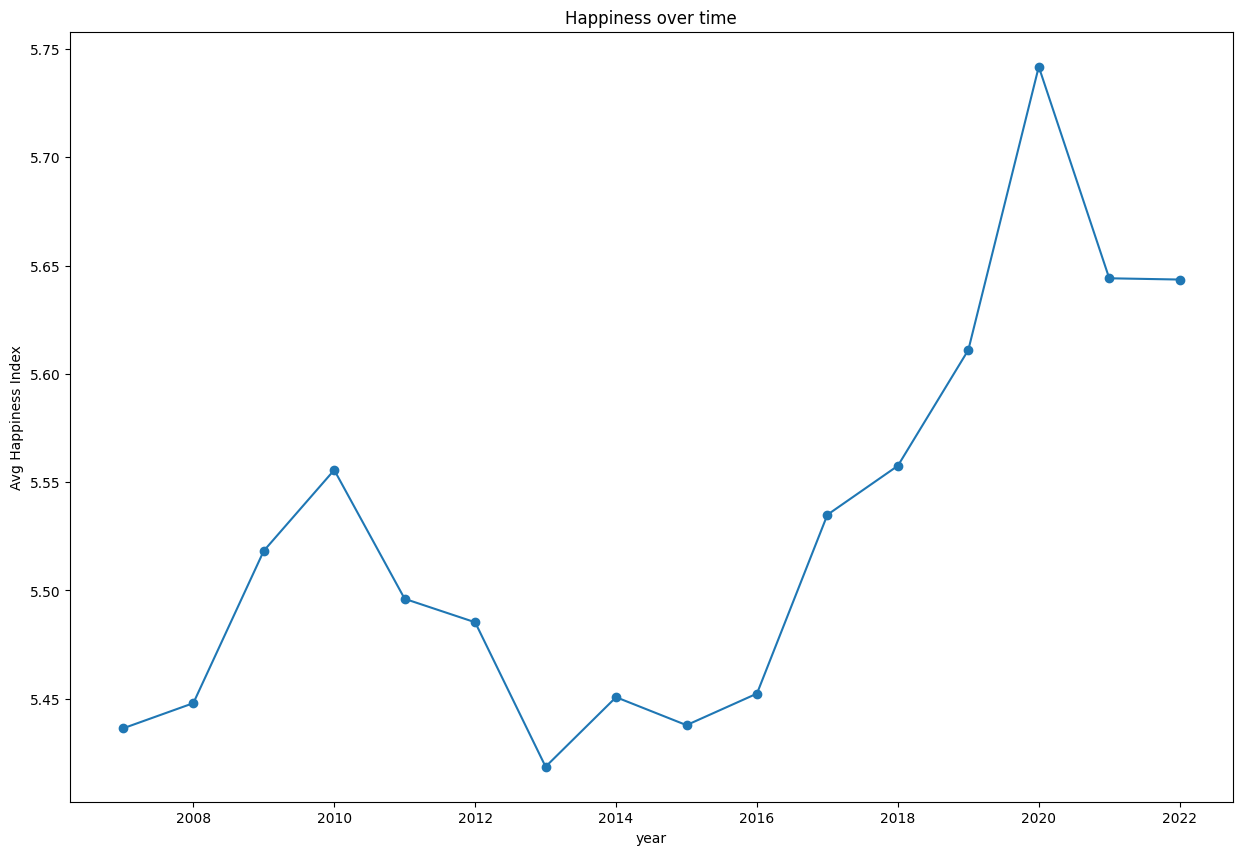

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(LifeLadder_year_wise['year'],LifeLadder_year_wise['Life Ladder'],marker='o')
plt.title('Happiness over time')
plt.xlabel('year')
plt.ylabel('Avg Happiness Index')
plt.show()

**Finding mean value of Life Ladder for each country**

In [ ]:
average_life_ladder = data.groupby('Country name')['Life Ladder'].mean()

In [ ]:
average_life_ladder

Country name
Afghanistan    3.346643
Albania        5.047933
Algeria        5.377400
Argentina      6.281750
Armenia        4.638933
                 ...   
Venezuela      5.844000
Vietnam        5.391063
Yemen          3.912250
Zambia         4.427286
Zimbabwe       3.804000
Name: Life Ladder, Length: 132, dtype: float64

**Bar Graph for Top 10 and Bottom 10 Countries based on Mean Life Ladder**

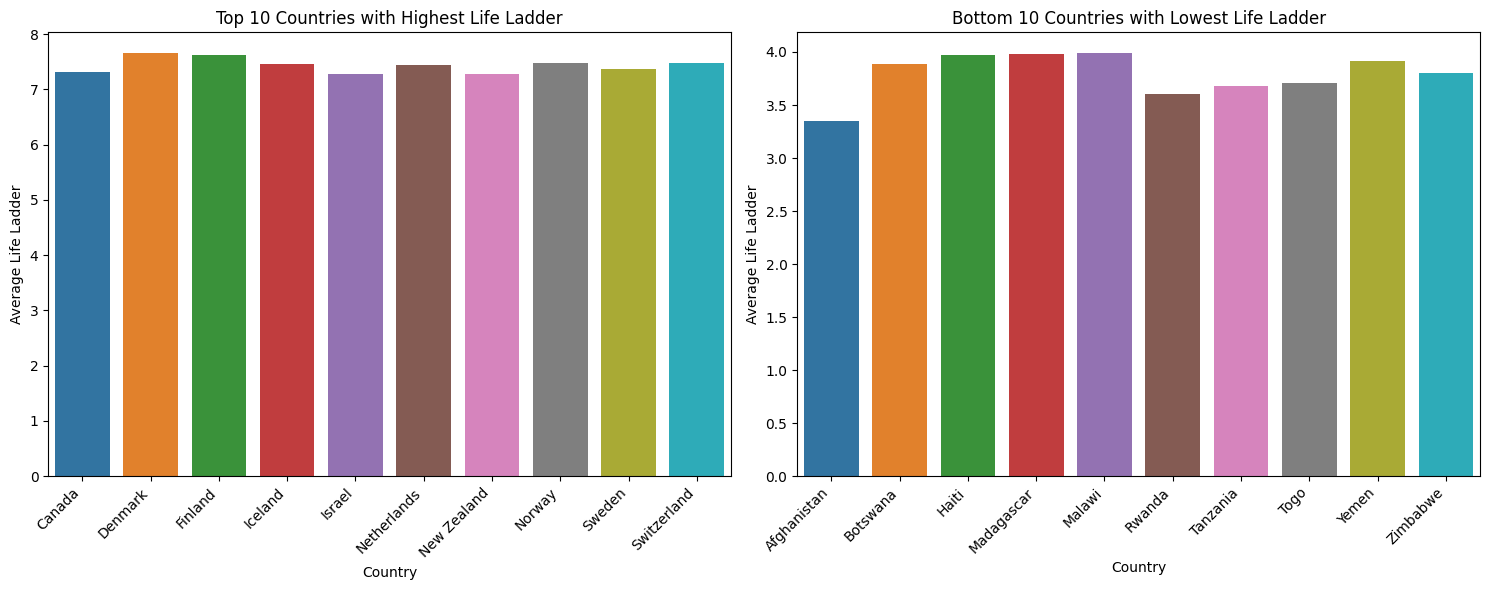

In [ ]:
# Calculate the average life ladder values for each country
average_life_ladder = data.groupby('Country name')['Life Ladder'].mean()

# Sort countries based on average life ladder values
sorted_countries = average_life_ladder.sort_values(ascending=False)

# Select the top 10 and bottom 10 countries
top_10_countries = sorted_countries.head(10)
bottom_10_countries = sorted_countries.tail(10)

# Filter the original DataFrame for the top 10 and bottom 10 countries
top_10_data = data[data['Country name'].isin(top_10_countries.index)]
bottom_10_data = data[data['Country name'].isin(bottom_10_countries.index)]

# Create bar plots using Seaborn
plt.figure(figsize=(15, 6))

# Bar plot for top 10 countries
plt.subplot(1, 2, 1)
sns.barplot(x='Country name', y='Life Ladder', data=top_10_data, errorbar=None)
plt.title('Top 10 Countries with Highest Life Ladder')
plt.xlabel('Country')
plt.ylabel('Average Life Ladder')
plt.xticks(rotation=45, ha='right')

# Bar plot for bottom 10 countries
plt.subplot(1, 2, 2)
sns.barplot(x='Country name', y='Life Ladder', data=bottom_10_data, errorbar=None)
plt.title('Bottom 10 Countries with Lowest Life Ladder')
plt.xlabel('Country')
plt.ylabel('Average Life Ladder')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

**Create a Bar Graph for countries who have been in top 10 the most number of times**

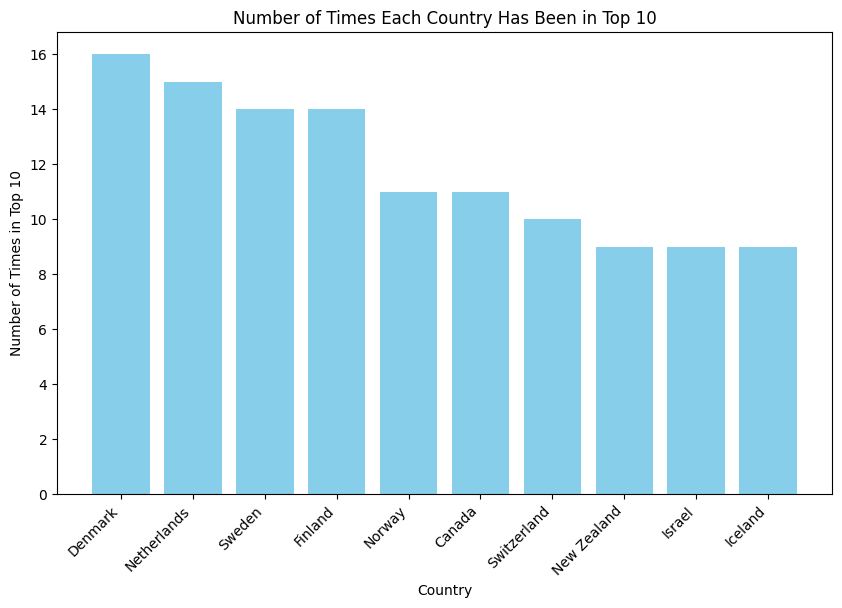

In [ ]:
# Sort the DataFrame by 'Life Ladder' in descending order
data_sorted = data.sort_values(by='Life Ladder', ascending=False)

# Initialize a dictionary to store the count for each country
country_counts = {}

# Iterate over each year
for year in data_sorted['year'].unique():
    # Get the top 10 countries for the current year
    top_10_countries = data_sorted[data_sorted['year'] == year].head(10)['Country name']

    # Update the count for each country
    for country in top_10_countries:
        country_counts[country] = country_counts.get(country, 0) + 1

# Convert the dictionary to a DataFrame
country_counts_df = pd.DataFrame(list(country_counts.items()), columns=['Country', 'Top 10 Count'])

# Sort the DataFrame by the count in descending order
country_counts_df = country_counts_df.sort_values(by='Top 10 Count', ascending=False)

# Plot the bar graph for the top 10 countries
plt.figure(figsize=(10, 6))
plt.bar(country_counts_df['Country'][:10], country_counts_df['Top 10 Count'][:10], color='skyblue')
plt.xlabel('Country')
plt.ylabel('Number of Times in Top 10')
plt.title('Number of Times Each Country Has Been in Top 10')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

**Created a Correlation Matrix**

<ipython-input-106-cbe400b4642e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


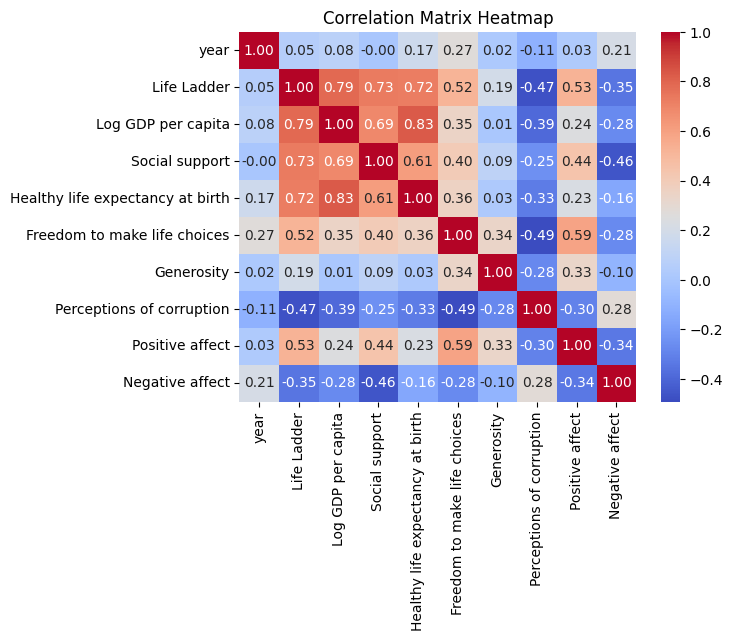

In [ ]:
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

**Created a Violin Plot of Happiness Index Over the Years for Top 15 Countries**

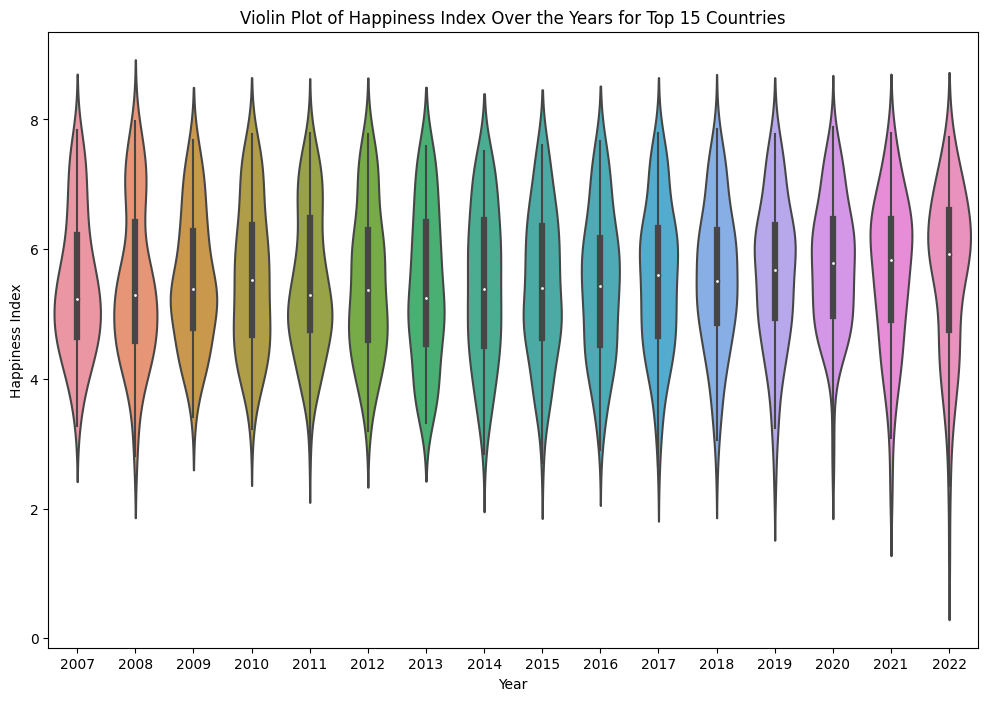

In [ ]:
top_15_data = data[data['Country name'].isin(data)]
plt.figure(figsize=(12, 8))
sns.violinplot(x='year', y='Life Ladder', data=data, split=True)
plt.title('Violin Plot of Happiness Index Over the Years for Top 15 Countries')
plt.xlabel('Year')
plt.ylabel('Happiness Index')
plt.show()

#**4. MACHINE LEARNING MODELS**

**Assigned our dataframe 'data' to 'ml_data'**

In [ ]:
ml_data=data

**Created a Simple Linear Regression model, trained and evaluated its performance based on few metrices**

Mean Squared Error: 0.25344450551980696
R-squared: 0.7959102303568403


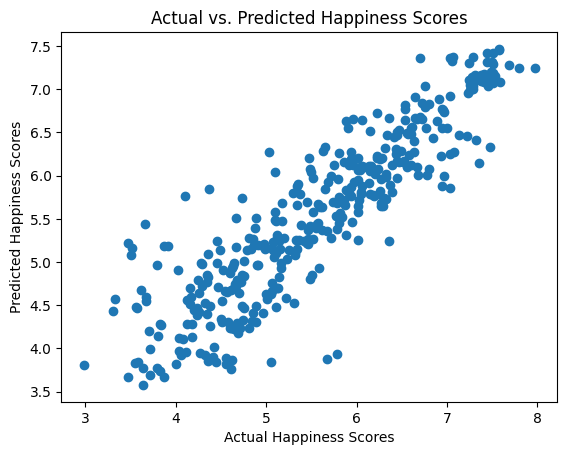


Model Coefficients:
                            Feature  Coefficient
0                Log GDP per capita     0.414599
1                    Social support     1.829273
2  Healthy life expectancy at birth     0.027005
3      Freedom to make life choices     0.290921
4                        Generosity     0.254135
5         Perceptions of corruption    -0.691473
6                   Positive affect     2.482103
7                   Negative affect     0.052928
8                         Intercept    -2.943995


<ipython-input-109-25e338ce29bd>:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coefficients = coefficients.append({'Feature': 'Intercept', 'Coefficient': model.intercept_}, ignore_index=True)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Features (independent variables) for prediction
features = ['Log GDP per capita', 'Social support', 'Healthy life expectancy at birth',
            'Freedom to make life choices', 'Generosity', 'Perceptions of corruption',
            'Positive affect', 'Negative affect']

# Target variable (dependent variable)
target = 'Life Ladder'

# Extract features and target variable from the original DataFrame 'data'
X = ml_data[features]
y = ml_data[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model with a different variable name (e.g., 'model')
model = LinearRegression()

# Train the model on the training set
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

from sklearn.metrics import r2_score
r_squared = r2_score(y_test, y_pred)
print(f"R-squared: {r_squared}")

# Visualize predicted vs. actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Happiness Scores')
plt.ylabel('Predicted Happiness Scores')
plt.title('Actual vs. Predicted Happiness Scores')
plt.show()

# Display the coefficients (importance) of each feature
coefficients = pd.DataFrame({'Feature': features, 'Coefficient': model.coef_})
coefficients = coefficients.append({'Feature': 'Intercept', 'Coefficient': model.intercept_}, ignore_index=True)
print("\nModel Coefficients:")
print(coefficients)

**Created a Random Forest Regression model, trained and evaluated its performance based on few metrices**

Mean Squared Error: 0.15149844272973684
R-squared: 0.8780037380783027


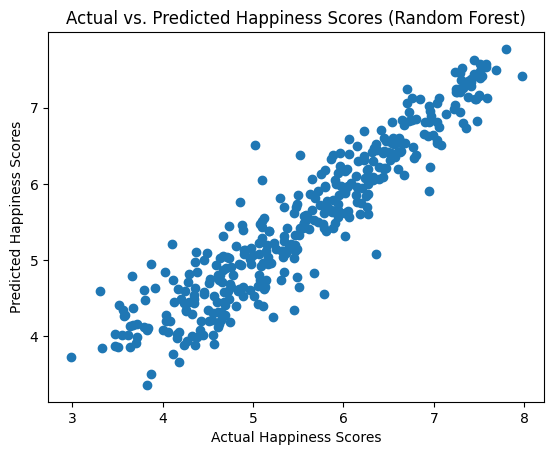


Feature Importances:
                            Feature  Importance
0                Log GDP per capita    0.661001
1                    Social support    0.055957
2  Healthy life expectancy at birth    0.063852
3      Freedom to make life choices    0.025673
4                        Generosity    0.023862
5         Perceptions of corruption    0.023926
6                   Positive affect    0.121067
7                   Negative affect    0.024662


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame with the happiness dataset

# Features (independent variables) for prediction
features = ['Log GDP per capita', 'Social support', 'Healthy life expectancy at birth','Freedom to make life choices', 'Generosity', 'Perceptions of corruption',
            'Positive affect', 'Negative affect']

# Target variable (dependent variable)
target = 'Life Ladder'

# Extract features and target variable from the original DataFrame 'data'
X = ml_data[features]
y = ml_data[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training set
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

from sklearn.metrics import r2_score
r_squared = r2_score(y_test, y_pred)
print(f"R-squared: {r_squared}")


# Visualize predicted vs. actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Happiness Scores')
plt.ylabel('Predicted Happiness Scores')
plt.title('Actual vs. Predicted Happiness Scores (Random Forest)')
plt.show()

# Display the feature importances
feature_importances = pd.DataFrame({'Feature': features, 'Importance': rf_model.feature_importances_})
print("\nFeature Importances:")
print(feature_importances)